<div class='bar_title'></div>

*Practical Data Science*

# Stochastic Gradient Descent

Matthias Griebel<br>
Chair of Information Systems and Management

Winter Semester 19/20

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Recap-Assignment-3:-Tabular-Models-and-Embeddings" data-toc-modified-id="Recap-Assignment-3:-Tabular-Models-and-Embeddings-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Recap Assignment 3: Tabular Models and Embeddings</a></span><ul class="toc-item"><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Creating-Learner" data-toc-modified-id="Creating-Learner-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Creating Learner</a></span></li><li><span><a href="#Find-the-learning-rate" data-toc-modified-id="Find-the-learning-rate-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Find the learning rate</a></span></li><li><span><a href="#Fit-the-model" data-toc-modified-id="Fit-the-model-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Fit the model</a></span></li><li><span><a href="#Embedding-Visualization" data-toc-modified-id="Embedding-Visualization-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Embedding Visualization</a></span></li></ul></li><li><span><a href="#Understanding-Stochastic-Gradient-Descent" data-toc-modified-id="Understanding-Stochastic-Gradient-Descent-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Understanding Stochastic Gradient Descent</a></span></li><li><span><a href="#Recap:-Matrix-Multiplication" data-toc-modified-id="Recap:-Matrix-Multiplication-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Recap: Matrix Multiplication</a></span></li><li><span><a href="#Fitting-a-Linear-Regression" data-toc-modified-id="Fitting-a-Linear-Regression-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Fitting a Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Loss-function" data-toc-modified-id="Loss-function-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Loss function</a></span></li><li><span><a href="#Gradient-Descent" data-toc-modified-id="Gradient-Descent-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Gradient Descent</a></span></li></ul></li><li><span><a href="#Vocabulary" data-toc-modified-id="Vocabulary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Vocabulary</a></span></li></ul></div>

__Lessons Learned Assingment 3__

- Again: Don't merge pull request
- Training a model should be easier with more data!
- Discuss or explain is not to be answered with one line of code!
- __We need a recap on embeddings ;)__

__Credits__

- Fast.ai lesseon 2: https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson2-sgd.ipynb
- Fast.ai lesseon 2 notes: https://github.com/hiromis/notes/blob/master/Lesson2.md

## Recap Assignment 3: Tabular Models and Embeddings

First, import everything we need for the tabular model

In [1]:
from fastai import * 
from fastai.tabular import * 
from sklearn.model_selection import train_test_split

### Preprocessing

__Loading the data from Assignment 3__

In [2]:
data_path = 'https://raw.githubusercontent.com/pds1920/_a2-template/master/data/video_game_sales.csv'
df = pd.read_csv(data_path)
df.head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,82.53,76.0,51.0,8.0,322.0,E
1,Super Mario Bros.,NES,1985.0,Platform,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,35.52,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,32.77,80.0,73.0,8.0,192.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,31.37,NaN,NaN,NaN,NaN,NaN


__Creating a DataBunch__

In [3]:
dep_var = 'Global_Sales'
cat_names = ['Platform', 'Genre', 'Rating']
cont_names = ['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
procs = [FillMissing, Categorify, Normalize]
train_idx, valid_idx = train_test_split(range(len(df)), test_size=0.2, random_state = 0)
data = TabularDataBunch.from_df(path=data_path,df=df, dep_var=dep_var, valid_idx=valid_idx, 
                                procs=procs, cat_names=cat_names, cont_names=cont_names, bs=32)

Now we're ready to pass this information to `TabularDataBunch.from_df` to create the DataBunch that we'll use for training.

In [4]:
data = TabularDataBunch.from_df(path=data_path,df=df, dep_var=dep_var, valid_idx=valid_idx, 
                                procs=procs, cat_names=cat_names, cont_names=cont_names, bs=32)

### Creating Learner

- Using 100 nodes in the first and 50 nodes in the second layer
- [Metrics](https://docs.fast.ai/metrics.html) *root mean squared error* and mean *absolute error*
- Specify the embedding size of categorical variable `Rating`

In [75]:
learn = tabular_learner(data, 
                        layers=[100,50], 
                        emb_szs={'Rating': 5},
                        metrics=[mse, mae])

__Schematic Network architecture (Titanic Data Set)__

Fastai figures out the default values for our model but lot of these can be customised while creating the data bunch and learner. 


<img src="https://confusedcoders.com/wp-content/uploads/2019/06/untitled-3-1024x403.jpg" style="width:100%" />

[Source](https://confusedcoders.com/wp-content/uploads/2019/06/untitled-3-1024x403.jpg)

In [76]:
learn.data.show_batch()

Platform,Genre,Rating,Year_of_Release_na,Critic_Score_na,Critic_Count_na,User_Score_na,User_Count_na,Year_of_Release,Critic_Score,Critic_Count,User_Score,User_Count,target
PS3,Shooter,M,False,True,True,False,False,1.6279,0.0990,-0.1863,-0.1258,-0.2115,0.02
PS,Role-Playing,#na#,False,True,True,True,True,-0.9293,0.0990,-0.1863,0.0024,-0.1615,1.21
PC,Sports,E,False,True,True,False,False,1.4574,0.0990,-0.1863,-5.6477,-0.2036,0.01
PS2,Shooter,T,False,False,False,False,False,-0.5883,-0.8240,0.1875,-0.1258,-0.2009,0.13
PS,Fighting,T,False,True,True,False,False,-1.0998,0.0990,-0.1863,1.7477,-0.1221,0.11


In [77]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(32, 11)
    (1): Embedding(13, 7)
    (2): Embedding(9, 5)
    (3): Embedding(3, 3)
    (4): Embedding(3, 3)
    (5): Embedding(3, 3)
    (6): Embedding(3, 3)
    (7): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=43, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=100, out_features=50, bias=True)
    (4): ReLU(inplace=True)
    (5): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=50, out_features=1, bias=True)
  )
)

__Rule of thumb__

from: https://github.com/fastai/fastai/blob/master/fastai/tabular/data.py

the new formula:

```python
def emb_sz_rule(n_cat:int)->int: return min(600, round(1.6 * n_cat**0.56))
```

e.g., for Genre

In [81]:
??tabular.data.emb_sz_rule

In [78]:
n_cat = df.Genre.nunique(dropna=False); n_cat

13

In [82]:
min(600, round(1.6 * n_cat**0.56))

7

### Find the learning rate 
We need to find a suitable learning rate for the training
- Read the [docs](https://docs.fast.ai/callbacks.lr_finder.html) how to find the right learning rate

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


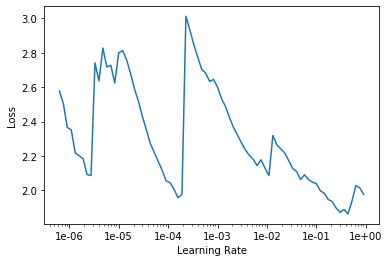

In [85]:
learn.lr_find()
learn.recorder.plot()

### Fit the model

In [27]:
learn.fit_one_cycle(3, max_lr=slice(1e-04))

epoch,train_loss,valid_loss,mean_squared_error,mean_absolute_error,time
0,1.944258,2.072669,2.072669,0.611319,00:02
1,2.718993,1.879714,1.879714,0.512408,00:02
2,1.726043,1.822350,1.822350,0.494935,00:02


Why do we use `slice` here?

### Embedding Visualization

The SummaryWriter class is your main entry to log data

In [86]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

Export embeddings:

In [87]:
emb_names = list(learn.data.x.classes.keys())
for i, emb in enumerate(learn.model.embeds):
    emb_name = emb_names[i]
    writer.add_embedding(emb.weight.data, metadata=learn.data.x[0].classes[emb_name],
                         global_step=i, tag=emb_name)

We can now
- View the exported embedding (as .tsv file)
- Open tensorboard and use various dimensionality reduction techniques (PCA, TSNE, UMAP)
- Upload the files on the official Tensorflow [Embedding Projector](https://projector.tensorflow.org/)

to get a better understanding of the embeddings.

## Understanding Stochastic Gradient Descent

__Gradient Descent: Finding the minimum__

The gradient descent optimisation algorithm aims to minimise some cost/loss function based on that function’s gradient.

![Minimum](https://miro.medium.com/max/679/1*P7z2BKhd0R-9uyn9ThDasA.png)
[Source](https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a)

__What is Stochastic gradient descent?__

from [Wikipedia]()

_"Stochastic gradient descent (often abbreviated SGD) is an iterative method for optimizing an objective function with suitable smoothness properties (e.g. differentiable or subdifferentiable). It can be regarded as a stochastic approximation of gradient descent optimization, since it replaces the actual gradient (calculated from the entire data set) by an estimate thereof (calculated from a __randomly selected subset of the data__)."_

Many improvements on the basic stochastic gradient descent algorithm have been proposed and used. For example, 
- Momentum
- RMSProp
- Adam

__Visualizing Different Optimization Algorithms__

Animations from https://imgur.com/a/Hqolp#NKsFHJb

![Saddle Point](https://i.imgur.com/NKsFHJb.gif?1)



![Long Valley](https://i.imgur.com/pD0hWu5.gif?1)



So, how do we find a function that recognizes the number eight?

![lessen2notes](https://github.com/hiromis/notes/raw/master/lesson2/19.png)

## Recap: Matrix Multiplication

From http://matrixmultiplication.xyz/ by Andre Staltz

![mmult](https://github.com/hiromis/notes/raw/master/lesson2/matrix.gif)

In [121]:
# In Python Code

m = np.array([(1,2,1), (0,1,0), (2,3,4)])
v = np.array([2,6,1])

print(m.shape, v.shape)

(3, 3) (3,)


In [122]:
m@v

array([15,  6, 26])

In [123]:
np.matmul(m,v)

array([15,  6, 26])

## Fitting a Linear Regression

Let's start with a simple functions

$y = ax + b$

$a$ gradient of the line
$b$ the intercept of the line

We can rewrite the function as

$y = a_1x_1 + a_2x_2$ 

with $x_2=1$

The goal of linear regression is to fit a line to a set of points.

Let's create a some data we can fit (using pytorch)

In [124]:
n=100

In [125]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.5145,  1.0000],
        [ 0.1527,  1.0000],
        [-0.2312,  1.0000],
        [ 0.0791,  1.0000],
        [ 0.7308,  1.0000]])

In [126]:
a = tensor(3.,2); a

tensor([3., 2.])

In [129]:
y = x@a + torch.rand(n)

Visualize the data

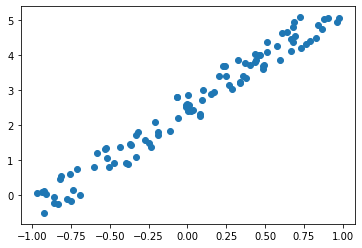

In [130]:
plt.scatter(x[:,0], y);

### Loss function

We want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

$MSE =\frac{\sum(\hat{y}-y)^2}{n}$

In [131]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [132]:
a = tensor(-1.,1)

In [133]:
y_hat = x@a
mse(y_hat, y)

tensor(7.2657)

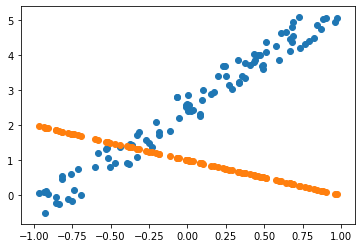

In [134]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

### Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [135]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [136]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

The `update` function is going to:

- __Calculate y_hat__ (i.e. our prediction)

- __Calculate loss__ (i.e. our mean squared error)

- From time to time, it will print that out so we can see how we're going

- __Calculate the gradient.__ In PyTorch, calculating the gradient is done by using a method called backward. Mean squared error was just a simple standard mathematical function. PyTorch keeps track of how it was calculated and lets us calculate the derivative. So if you do a mathematical operation on a tensor in PyTorch, you can call backward to calculate the derivative and the derivative gets stuck inside an attribute called .grad.

- __Take the coefficients and I'm going to subtract from them my gradient (sub_)__. There is an underscore there because that's going to do it in-place. It's going to actually update those coefficients a to subtract the gradients from them. 
    - Why do we subtract? Because the gradient tells us if I move the whole thing downwards, the loss goes up. If I move the whole thing upwards, the loss goes down. So I want to do the opposite of the thing that makes it go up. We want our loss to be small.

- lr is our learning rate.

In [137]:
lr = 1e-1
for t in range(100): update()

tensor(7.2657, grad_fn=<MeanBackward0>)
tensor(1.3624, grad_fn=<MeanBackward0>)
tensor(0.4446, grad_fn=<MeanBackward0>)
tensor(0.1881, grad_fn=<MeanBackward0>)
tensor(0.1141, grad_fn=<MeanBackward0>)
tensor(0.0927, grad_fn=<MeanBackward0>)
tensor(0.0865, grad_fn=<MeanBackward0>)
tensor(0.0847, grad_fn=<MeanBackward0>)
tensor(0.0842, grad_fn=<MeanBackward0>)
tensor(0.0840, grad_fn=<MeanBackward0>)


__Let's plot__

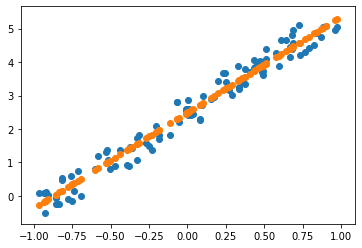

In [138]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

__or animate it!__

In [139]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [141]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

In [142]:
animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

__What happen if you choose a higer/lower learning rate?__

## Vocabulary

- __Learning rate__: A thing we multiply our gradient by to decide how much to update the weights by.
- __Epoch__: One complete run through all of our data points (e.g. all of our images). So for non-stochastic gradient descent we just did, every single loop, we did the entire dataset. But if you’ve got a dataset with a thousand images and our mini-batch size is 100, then it would take you 10 iterations to see every image once. So that would be one epoch. Epochs are important because if you do lots of epochs, then you are looking at your images lots of times, so every time you see an image, there’s a bigger chance of overfitting. So we generally don’t want to do too many epochs.
- __Mini-batch__: A random bunch of points that you use to update your weights.
- __SGD__: Gradient descent using mini-batches.

- __Model / Architecture__: They kind of mean the same thing. In this case, our architecture is the architecture is the mathematical function that you’re fitting the parameters to. And we’re going to learn later today or next week what the mathematical function of things like ResNet34 actually is. But it’s basically pretty much what you’ve just seen. It’s a bunch of matrix products.

- __Parameters / Coefficients / Weights__: Numbers that you are updating.
- __Loss function__: The thing that’s telling you how far away or how close you are to the correct answer. For classification problems, we use cross entropy loss, also known as negative log-likelihood loss. This penalizes incorrect confident predictions, and correct unconfident predictions.